In [1]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
from graphviz import Digraph
from IPython.display import display, Image

In [2]:
# Assume we have collected below observations of working from home or office (Synthatic/dummy Data)
data = pd.DataFrame({
    "Traffic Condition": ["Heavy", "Light", "Heavy", "Light", "Heavy", "Light"],
    "Workload Urgency": ["High", "Low", "Low", "High", "High", "High"],
    "Decision": ["WFH", "WFO", "WFO", "WFO", "WFH", "WFO"]
})

data

,Traffic Condition,Workload Urgency,Decision
0,Heavy,High,WFH
1,Light,Low,WFO
2,Heavy,Low,WFO
3,Light,High,WFO
4,Heavy,High,WFH
5,Light,High,WFO


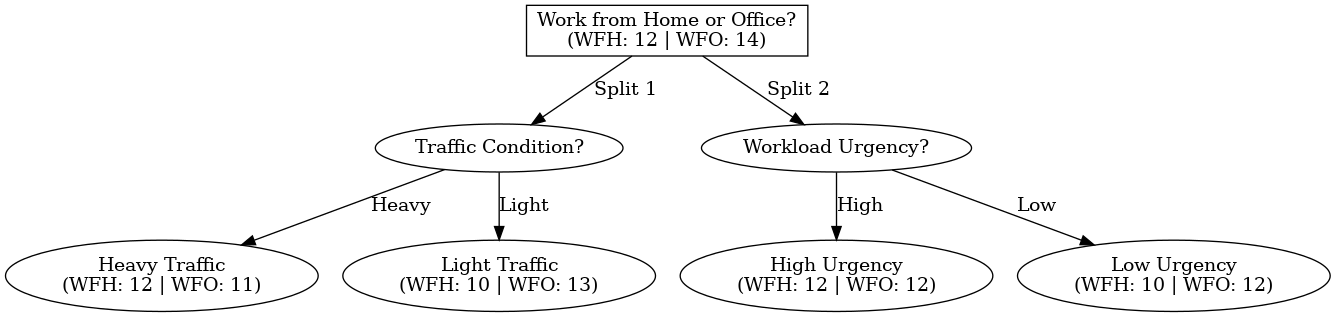

In [7]:
dag = Digraph(comment="Traffic-Based Decision Tree", format="png")


dag.node("A", "Work from Home or Office?\n(WFH: 12 | WFO: 14)", shape="box")

dag.node("B1", "Traffic Condition?")
dag.edge("A", "B1", label="Split 1")

dag.node("C1", "Heavy Traffic\n(WFH: 12 | WFO: 11)")
dag.node("C2", "Light Traffic\n(WFH: 10 | WFO: 13)")
dag.edge("B1", "C1", label="Heavy")
dag.edge("B1", "C2", label="Light")


dag.node("B2", "Workload Urgency?")
dag.edge("A", "B2", label="Split 2")

dag.node("D1", "High Urgency\n(WFH: 12 | WFO: 12)")
dag.node("D2", "Low Urgency\n(WFH: 10 | WFO: 12)")
dag.edge("B2", "D1", label="High")
dag.edge("B2", "D2", label="Low")

# dot.render("traffic_decision_tree", view=True)
dag_path = dag.render('./Data/entropy_example_0.png', cleanup=True)
display(Image(dag_path))


## Should we split based on Traffic Condition or Workload Urgency?

In [4]:
# Define entropy calculation function
def compute_entropy(class_counts):
    probabilities = np.array(class_counts) / sum(class_counts)
    return entropy(probabilities, base=2)

In [5]:
# Calculate parent entropy
E_parent = compute_entropy([12, 14])  # Class: 2 WFH, 4 WFO
print("Parent Entropy:", E_parent)

Parent Entropy: 0.9957274520849256


In [6]:
# Case 1: Split by Traffic Condition
E_heavy_traffic = compute_entropy([12, 11])  # 2: WFH, 1: WFO
E_light_traffic = compute_entropy([10, 13])  # 0: WFH, 3: WFO
IG_traffic = E_parent - ((13/26) * E_heavy_traffic + (13/26) * E_light_traffic)

print("Entropy (Heavy Traffic):", E_heavy_traffic)
print("Entropy (Light Traffic):", E_light_traffic)
print("Information Gain (Traffic Condition):", IG_traffic)

Entropy (Heavy Traffic): 0.9986359641585719
Entropy (Light Traffic): 0.9876925088958033
Information Gain (Traffic Condition): 0.0025632155577380855


In [8]:
# Case 2: Split by Workload Urgency
E_high_urgency = compute_entropy([12, 12])  # 2: WFH, 2: WFO
E_low_urgency = compute_entropy([10, 12])  # 0: WFH, 2: WFO
IG_workload = E_parent - ((14/26) * E_high_urgency + (12/26) * E_low_urgency)
print("Entropy (High Urgency):", E_high_urgency)
print("Entropy (Low Urgency):", E_low_urgency)
print("Information Gain (Workload Urgency):", IG_workload)

Entropy (High Urgency): 1.0
Entropy (Low Urgency): 0.9940302114769566
Information Gain (Workload Urgency): -0.001517260904438933


In [9]:
# Print entropy and information gain results
print("\nEntropy Values:")
print(f"Parent Entropy: {E_parent:.3f}")
print(f"Traffic Condition - Heavy: {E_heavy_traffic:.3f}, Light: {E_light_traffic:.3f}")
print(f"Workload Urgency - High: {E_high_urgency:.3f}, Low: {E_low_urgency:.3f}")

print("\nInformation Gain:")
print(f"Information Gain for Traffic Condition: {IG_traffic:.3f}")
print(f"Information Gain for Workload Urgency: {IG_workload:.3f}")


Entropy Values:
Parent Entropy: 0.996
Traffic Condition - Heavy: 0.999, Light: 0.988
Workload Urgency - High: 1.000, Low: 0.994

Information Gain:
Information Gain for Traffic Condition: 0.003
Information Gain for Workload Urgency: -0.002


## Feature Selection for Splitting
Based on the calculated information gain:
- **Traffic Condition** has an information gain of 0.459.
- **Workload Urgency** has an information gain of 0.252.

Since **Traffic Condition** has a higher information gain, it will be used as the first feature to split the data.

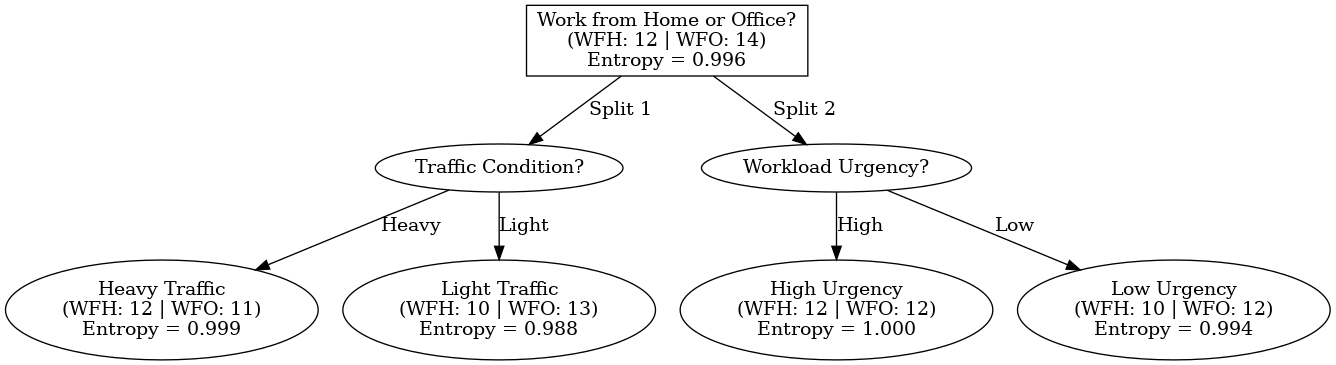

In [10]:
# Decision Tree Visualization using Graphviz
dag = Digraph(comment="Traffic-Based Decision Tree", format="png")

dag.node(f"A", "Work from Home or Office?\n(WFH: 12 | WFO: 14)\nEntropy = {:.3f}".format(E_parent), shape="box")

# First split: Traffic Condition
dag.node("B1", "Traffic Condition?")
dag.edge("A", "B1", label="Split 1")

dag.node("C1", "Heavy Traffic\n(WFH: 12 | WFO: 11)\nEntropy = {:.3f}".format(E_heavy_traffic))
dag.node("C2", "Light Traffic\n(WFH: 10 | WFO: 13)\nEntropy = {:.3f}".format(E_light_traffic))
dag.edge("B1", "C1", label="Heavy")
dag.edge("B1", "C2", label="Light")

# Second split: Workload Urgency
dag.node("B2", "Workload Urgency?")
dag.edge("A", "B2", label="Split 2")

dag.node("D1", "High Urgency\n(WFH: 12 | WFO: 12)\nEntropy = {:.3f}".format(E_high_urgency))
dag.node("D2", "Low Urgency\n(WFH: 10 | WFO: 12)\nEntropy = {:.3f}".format(E_low_urgency))
dag.edge("B2", "D1", label="High")
dag.edge("B2", "D2", label="Low")

# dot.render("traffic_decision_tree", view=True)
dag_path = dag.render('./Data/entropy_example.png', cleanup=True)
display(Image(dag_path))
